Zadanie5:
Otwórz plik prace.txt zawierający ID wybranych prac z PubMed. Pobierz MeshTerms'y (TAG: DescriptorName) dla każdej pracy.
Prace dotyczą 3 tematyk (po 18 prac na jedną tematykę).

Efektem powinna być lista list meshtermsów. 

Następnie, używając metody TF-IDF i podobieństwa cosinusowego zwizualizuj podobieństwo pomiędzy pracami (narysuj
macierz). 

Możesz dodatkowo zastosować metodę PCA do redukcji wymiaru i tym samym zaprezentować wyniki w postaci 2D. Skomentuj  
otrzymane wyniki.

In [1]:
import re
# opening the file in read mode 
my_file = open("prace.txt", "r") 
  
# reading the file 
data = my_file.read() 
  
# replacing end splitting the text  
# when newline ('\n') is seen. 
prace_list = data.split("\n") 
print(prace_list) 
my_file.close() 

len(prace_list)

['9501997', '9501992', '9461286', '9349810', '9405347', '9396754', '9389651', '9375406', '9375405', '9375398', '9375397', '9375393', '9349280', '9349279', '9349276', '9349271', '9349270', '9349269', '24220173', '24185377', '24178304', '23941641', '23936775', '23835611', '23786349', '23672311', '23638624', '23585033', '23557840', '23543220', '23529860', '23464809', '23453843', '23425969', '23416097', '23412914', '20527265', '20486098', '20469721', '20441060', '20400786', '20388956', '20224149', '20306742', '20232015', '20232003', '20218127', '20199470', '20193516', '20191880', '20191873', '20191872', '20191819', '20191156']


54

In [2]:
from urllib.request import urlopen
from lxml import etree
xml_list=[]
##########NASZE ZAPYTANIE
for PMID in prace_list:
    baseurl = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
    query = "db=pubmed&id="+PMID+"&format=xml"    
########################


#########OTWORZ URL I PRZECZYTAJ XML
    url = baseurl+query
    f = urlopen(url) 
    resultxml = f.read() 
    xml = etree.XML(resultxml) 
###################################
    xml_list.append(xml)

print(xml_list)
N=len(xml_list)
print(N)

tags = list({elem.tag for elem in xml.iter()}) #co sie moge dowiedzieć o tej pracy?
print(tags)



[<Element PubmedArticleSet at 0x1f30c0dcf80>, <Element PubmedArticleSet at 0x1f30c1fab40>, <Element PubmedArticleSet at 0x1f30c0dd680>, <Element PubmedArticleSet at 0x1f30c27b080>, <Element PubmedArticleSet at 0x1f30c27ab80>, <Element PubmedArticleSet at 0x1f30c27bc00>, <Element PubmedArticleSet at 0x1f30c097540>, <Element PubmedArticleSet at 0x1f30c27a1c0>, <Element PubmedArticleSet at 0x1f30c27a840>, <Element PubmedArticleSet at 0x1f30c27acc0>, <Element PubmedArticleSet at 0x1f30c27afc0>, <Element PubmedArticleSet at 0x1f30c27a180>, <Element PubmedArticleSet at 0x1f30c266ec0>, <Element PubmedArticleSet at 0x1f30c264080>, <Element PubmedArticleSet at 0x1f30c264180>, <Element PubmedArticleSet at 0x1f30c264340>, <Element PubmedArticleSet at 0x1f30c2668c0>, <Element PubmedArticleSet at 0x1f30c265180>, <Element PubmedArticleSet at 0x1f30c266000>, <Element PubmedArticleSet at 0x1f30c2652c0>, <Element PubmedArticleSet at 0x1f30c266180>, <Element PubmedArticleSet at 0x1f30c2650c0>, <Element 

In [3]:
#Zapisz wszystkie mesh do listy, policz
mesh_all=[]
for xml in xml_list:
    resultelements2= xml.xpath("//DescriptorName") 
    for element in resultelements2:
        mesh_all.append(element.text)
    
print(len(mesh_all), mesh_all)

755 ['Arabidopsis', 'Base Sequence', 'Chromosome Mapping', 'Chromosomes', 'Cloning, Molecular', 'DNA, Plant', 'Gene Expression', 'Genes, Plant', 'Molecular Sequence Data', 'Arabidopsis', 'Base Sequence', 'DNA, Plant', 'Molecular Sequence Data', 'Restriction Mapping', 'Amino Acid Sequence', 'Arabidopsis', 'Cells, Cultured', 'Cellulose', 'Chromatin', 'Chromosomal Proteins, Non-Histone', 'Cloning, Molecular', 'Conserved Sequence', 'DNA, Complementary', 'DNA-Binding Proteins', 'Electrophoresis, Polyacrylamide Gel', 'Escherichia coli', 'Gene Expression Regulation, Plant', 'High Mobility Group Proteins', 'Molecular Sequence Data', 'Phylogeny', 'Plant Proteins', 'Protein Binding', 'Recombinant Proteins', 'Sequence Alignment', 'Sequence Analysis, DNA', 'Arabidopsis', 'Cells, Cultured', 'Gene Targeting', 'Genes, Homeobox', 'Genes, Plant', 'Mutagenesis, Insertional', 'Polymerase Chain Reaction', 'Recombination, Genetic', 'Amino Acid Sequence', 'Animals', 'Arabidopsis', 'Arabidopsis Proteins', 'B

In [4]:
#stworz slownik dla kazdego arykułu jako key
art_mesh_dict = {}
for xml in xml_list:
    art_mesh_dict[xml_list.index(xml)] = []
print(art_mesh_dict)


{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: []}


In [5]:
#dodaj mesh values do kazdego arytkułu
for xml in xml_list:
    resultelements= xml.xpath("//DescriptorName") 
    for element in resultelements:
        #art_mesh_dict.append(element.text)
        art_mesh_dict[xml_list.index(xml)].append(element.text)
print(art_mesh_dict)

{0: ['Arabidopsis', 'Base Sequence', 'Chromosome Mapping', 'Chromosomes', 'Cloning, Molecular', 'DNA, Plant', 'Gene Expression', 'Genes, Plant', 'Molecular Sequence Data'], 1: ['Arabidopsis', 'Base Sequence', 'DNA, Plant', 'Molecular Sequence Data', 'Restriction Mapping'], 2: ['Amino Acid Sequence', 'Arabidopsis', 'Cells, Cultured', 'Cellulose', 'Chromatin', 'Chromosomal Proteins, Non-Histone', 'Cloning, Molecular', 'Conserved Sequence', 'DNA, Complementary', 'DNA-Binding Proteins', 'Electrophoresis, Polyacrylamide Gel', 'Escherichia coli', 'Gene Expression Regulation, Plant', 'High Mobility Group Proteins', 'Molecular Sequence Data', 'Phylogeny', 'Plant Proteins', 'Protein Binding', 'Recombinant Proteins', 'Sequence Alignment', 'Sequence Analysis, DNA'], 3: ['Arabidopsis', 'Cells, Cultured', 'Gene Targeting', 'Genes, Homeobox', 'Genes, Plant', 'Mutagenesis, Insertional', 'Polymerase Chain Reaction', 'Recombination, Genetic'], 4: ['Amino Acid Sequence', 'Animals', 'Arabidopsis', 'Arabi

In [6]:
#Sprawdz czy jest tyle samo mesh terms
count = 0
for x in art_mesh_dict:
    if isinstance(art_mesh_dict[x], list):
        count += len(art_mesh_dict[x])
print(count)

755


In [7]:
#stworz liste list mesh
mesh_without_key =[]
for x in art_mesh_dict:
    mesh_without_key.append(art_mesh_dict[x])
print(mesh_without_key)


[['Arabidopsis', 'Base Sequence', 'Chromosome Mapping', 'Chromosomes', 'Cloning, Molecular', 'DNA, Plant', 'Gene Expression', 'Genes, Plant', 'Molecular Sequence Data'], ['Arabidopsis', 'Base Sequence', 'DNA, Plant', 'Molecular Sequence Data', 'Restriction Mapping'], ['Amino Acid Sequence', 'Arabidopsis', 'Cells, Cultured', 'Cellulose', 'Chromatin', 'Chromosomal Proteins, Non-Histone', 'Cloning, Molecular', 'Conserved Sequence', 'DNA, Complementary', 'DNA-Binding Proteins', 'Electrophoresis, Polyacrylamide Gel', 'Escherichia coli', 'Gene Expression Regulation, Plant', 'High Mobility Group Proteins', 'Molecular Sequence Data', 'Phylogeny', 'Plant Proteins', 'Protein Binding', 'Recombinant Proteins', 'Sequence Alignment', 'Sequence Analysis, DNA'], ['Arabidopsis', 'Cells, Cultured', 'Gene Targeting', 'Genes, Homeobox', 'Genes, Plant', 'Mutagenesis, Insertional', 'Polymerase Chain Reaction', 'Recombination, Genetic'], ['Amino Acid Sequence', 'Animals', 'Arabidopsis', 'Arabidopsis Proteins

In [8]:
#znajdz unique słowa
unique_words = set(sum(mesh_without_key, []))

print(unique_words)
len(unique_words)

{'Microscopy, Electron, Scanning', 'Tubulin Modulators', 'Molecular Docking Simulation', 'Cell Division', 'Protein Isoforms', 'Drug Design', 'Dose-Response Relationship, Drug', 'Adenosine Triphosphatases', 'Gene Expression', 'Cell Line', 'Triazoles', 'Omentum', 'Genes, Reporter', 'Mitochondria', 'Chronic Disease', 'IgA Vasculitis', 'HeLa Cells', 'Aged', 'Protein Conformation', 'Antibodies, Bacterial', 'p38 Mitogen-Activated Protein Kinases', 'HCT116 Cells', 'Phospholipids', 'Risk Factors', 'Abdominal Pain', 'Quinazolinones', 'DNA-Binding Proteins', 'Mutation', 'Antidiuretic Hormone Receptor Antagonists', 'Duodenal Ulcer', 'Aging', 'Rats', 'Oxidation-Reduction', 'Antimycin A', 'DNA, Complementary', 'Benzimidazoles', 'Structure-Activity Relationship', 'Nuclear Proteins', 'Iran', 'Chi-Square Distribution', 'JNK Mitogen-Activated Protein Kinases', 'DNA Methylation', 'Epithelial Cells', 'Family Health', 'Peptic Ulcer Perforation', 'Hygiene', 'Surveys and Questionnaires', 'Nitric Oxide Synth

363

In [9]:
num_of_words = []

for i in range(N):
    nw = dict.fromkeys(unique_words,0)
    for word in mesh_without_key[i]:
        nw[word]+=1
        
    num_of_words+=[nw]

print(num_of_words)



[{'Microscopy, Electron, Scanning': 0, 'Tubulin Modulators': 0, 'Molecular Docking Simulation': 0, 'Cell Division': 0, 'Protein Isoforms': 0, 'Drug Design': 0, 'Dose-Response Relationship, Drug': 0, 'Adenosine Triphosphatases': 0, 'Gene Expression': 1, 'Cell Line': 0, 'Triazoles': 0, 'Omentum': 0, 'Genes, Reporter': 0, 'Mitochondria': 0, 'Chronic Disease': 0, 'IgA Vasculitis': 0, 'HeLa Cells': 0, 'Aged': 0, 'Protein Conformation': 0, 'Antibodies, Bacterial': 0, 'p38 Mitogen-Activated Protein Kinases': 0, 'HCT116 Cells': 0, 'Phospholipids': 0, 'Risk Factors': 0, 'Abdominal Pain': 0, 'Quinazolinones': 0, 'DNA-Binding Proteins': 0, 'Mutation': 0, 'Antidiuretic Hormone Receptor Antagonists': 0, 'Duodenal Ulcer': 0, 'Aging': 0, 'Rats': 0, 'Oxidation-Reduction': 0, 'Antimycin A': 0, 'DNA, Complementary': 0, 'Benzimidazoles': 0, 'Structure-Activity Relationship': 0, 'Nuclear Proteins': 0, 'Iran': 0, 'Chi-Square Distribution': 0, 'JNK Mitogen-Activated Protein Kinases': 0, 'DNA Methylation': 0

In [10]:
def computeTF(wordDict):
    tfDict = {}
    M = wordDict.values()
    for word, count in wordDict.items():
        tfDict[word] = count/max(M)
    return tfDict

In [11]:
tf = [computeTF(num_of_words[i]) for i in range(len(mesh_without_key))]

print(tf)

[{'Microscopy, Electron, Scanning': 0.0, 'Tubulin Modulators': 0.0, 'Molecular Docking Simulation': 0.0, 'Cell Division': 0.0, 'Protein Isoforms': 0.0, 'Drug Design': 0.0, 'Dose-Response Relationship, Drug': 0.0, 'Adenosine Triphosphatases': 0.0, 'Gene Expression': 1.0, 'Cell Line': 0.0, 'Triazoles': 0.0, 'Omentum': 0.0, 'Genes, Reporter': 0.0, 'Mitochondria': 0.0, 'Chronic Disease': 0.0, 'IgA Vasculitis': 0.0, 'HeLa Cells': 0.0, 'Aged': 0.0, 'Protein Conformation': 0.0, 'Antibodies, Bacterial': 0.0, 'p38 Mitogen-Activated Protein Kinases': 0.0, 'HCT116 Cells': 0.0, 'Phospholipids': 0.0, 'Risk Factors': 0.0, 'Abdominal Pain': 0.0, 'Quinazolinones': 0.0, 'DNA-Binding Proteins': 0.0, 'Mutation': 0.0, 'Antidiuretic Hormone Receptor Antagonists': 0.0, 'Duodenal Ulcer': 0.0, 'Aging': 0.0, 'Rats': 0.0, 'Oxidation-Reduction': 0.0, 'Antimycin A': 0.0, 'DNA, Complementary': 0.0, 'Benzimidazoles': 0.0, 'Structure-Activity Relationship': 0.0, 'Nuclear Proteins': 0.0, 'Iran': 0.0, 'Chi-Square Dist

In [12]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(),0)
    for document in documents:
        for word, val in document.items():
            if val>0:
                idfDict[word]+=1
    for word, val in idfDict.items():
        idfDict[word] = math.log2(N/float(val))
    return idfDict

In [13]:
idfs = computeIDF(num_of_words)

print(idfs)

{'Microscopy, Electron, Scanning': 5.754887502163468, 'Tubulin Modulators': 5.754887502163468, 'Molecular Docking Simulation': 3.4329594072761065, 'Cell Division': 5.754887502163468, 'Protein Isoforms': 5.754887502163468, 'Drug Design': 4.169925001442312, 'Dose-Response Relationship, Drug': 4.169925001442312, 'Adenosine Triphosphatases': 5.754887502163468, 'Gene Expression': 5.754887502163468, 'Cell Line': 5.754887502163468, 'Triazoles': 5.754887502163468, 'Omentum': 5.754887502163468, 'Genes, Reporter': 4.754887502163468, 'Mitochondria': 5.754887502163468, 'Chronic Disease': 4.169925001442312, 'IgA Vasculitis': 5.754887502163468, 'HeLa Cells': 4.754887502163468, 'Aged': 3.4329594072761065, 'Protein Conformation': 4.754887502163468, 'Antibodies, Bacterial': 5.754887502163468, 'p38 Mitogen-Activated Protein Kinases': 5.754887502163468, 'HCT116 Cells': 5.754887502163468, 'Phospholipids': 5.754887502163468, 'Risk Factors': 4.169925001442312, 'Abdominal Pain': 5.754887502163468, 'Quinazoli

In [14]:
def computeTFIDF(tfBag, idfs):
    tfidf = {}
    for word, val in tfBag.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [15]:
import pandas as pd #biblioteka do tworzenia ramek danych i operacji na nich

df = pd.DataFrame([computeTFIDF(tf[i], idfs) for i in range(N)])
print(df)

    Microscopy, Electron, Scanning  Tubulin Modulators  \
0                         0.000000            0.000000   
1                         0.000000            0.000000   
2                         0.000000            0.000000   
3                         0.000000            0.000000   
4                         0.000000            0.000000   
5                         0.000000            0.000000   
6                         0.000000            0.000000   
7                         0.000000            0.000000   
8                         0.000000            0.000000   
9                         5.754888            0.000000   
10                        0.000000            0.000000   
11                        0.000000            0.000000   
12                        0.000000            0.000000   
13                        0.000000            0.000000   
14                        0.000000            0.000000   
15                        0.000000            0.000000   
16            

In [16]:
df.iloc[0] #zerowy wiersz

Microscopy, Electron, Scanning     0.0
Tubulin Modulators                 0.0
Molecular Docking Simulation       0.0
Cell Division                      0.0
Protein Isoforms                   0.0
                                  ... 
Suppression, Genetic               0.0
Restriction Mapping                0.0
Chloroplasts                       0.0
Proto-Oncogene Proteins c-bcl-2    0.0
Rabbits                            0.0
Name: 0, Length: 363, dtype: float64

In [17]:
df.columns #nazwy kolumn

Index(['Microscopy, Electron, Scanning', 'Tubulin Modulators',
       'Molecular Docking Simulation', 'Cell Division', 'Protein Isoforms',
       'Drug Design', 'Dose-Response Relationship, Drug',
       'Adenosine Triphosphatases', 'Gene Expression', 'Cell Line',
       ...
       'beta Carotene', 'Stomach Ulcer', 'Solvents', 'Reference Values',
       'Antigens, Bacterial', 'Suppression, Genetic', 'Restriction Mapping',
       'Chloroplasts', 'Proto-Oncogene Proteins c-bcl-2', 'Rabbits'],
      dtype='object', length=363)

In [18]:

def cos_measure(x,y):
    import numpy as np
    return np.sum(x*y)/(np.sqrt(sum(x**2))*np.sqrt(sum(y**2)))

In [19]:
cosi=[]
for x in range(0,N):
    for y in range(x+1,N):
        cosi.append(cos_measure(df.iloc[x], df.iloc[y]))

print(cosi)

[0.2901271651653873, 0.06011875755657156, 0.058187772340144016, 0.06583886920534068, 0.010994780083466564, 0.14865542740026008, 0.016924287297655577, 0.059374624054969946, 0.2462034485384747, 0.12897158653330043, 0.08460637348996024, 0.0900848689673677, 0.09896502504059859, 0.16472290354910216, 0.18592445526549728, 0.1432091612055274, 0.1745826149568692, 0.0, 0.0, 0.020569213803967583, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01974141615026236, 0.0, 0.0, 0.0, 0.018335239422277976, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.046360814324957436, 0.030817821735241564, 0.05077190072868209, 0.018037098647978072, 0.15415336587886677, 0.02776454255720669, 0.09740494517726127, 0.10953931438860472, 0.15963393430133532, 0.08541730819042923, 0.23588484918260944, 0.1193316166043753, 0.14866416834592244, 0.19280076805538185, 0.11695175963407825, 0.0983338088023613, 0.0, 0.0, 0.033744098169950804, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032386083928

In [20]:
from sklearn.metrics.pairwise import cosine_similarity #laduje biblioteke do wyznaczenia macierzy podobienstw
import pandas as pd

similarity_matrix = cosine_similarity(df) #tworze macierz podobienstw pomiedzy dokumentami
similarity_df = pd.DataFrame(similarity_matrix)  #przerabiam na ramke danych
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1.000000,0.290127,0.060119,0.058188,0.065839,0.010995,0.148655,0.016924,0.059375,0.246203,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.290127,1.000000,0.046361,0.030818,0.050772,0.018037,0.154153,0.027765,0.097405,0.109539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.060119,0.046361,1.000000,0.082384,0.117033,0.035044,0.062219,0.053943,0.009793,0.011013,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.058188,0.030818,0.082384,1.000000,0.011389,0.009547,0.120748,0.116411,0.015360,0.053505,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.065839,0.050772,0.117033,0.011389,1.000000,0.056383,0.125719,0.051304,0.010725,0.012061,...,0.002766,0.002211,0.001616,0.002726,0.003788,0.001932,0.002254,0.001866,0.001970,0.001936
5,0.010995,0.018037,0.035044,0.009547,0.056383,1.000000,0.044748,0.161327,0.008990,0.080089,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.148655,0.154153,0.062219,0.120748,0.125719,0.044748,1.000000,0.068881,0.031548,0.057649,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.016924,0.027765,0.053943,0.116411,0.051304,0.161327,0.068881,1.000000,0.156427,0.015562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.059375,0.097405,0.009793,0.015360,0.010725,0.008990,0.031548,0.156427,1.000000,0.054597,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.246203,0.109539,0.011013,0.053505,0.012061,0.080089,0.057649,0.015562,0.054597,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


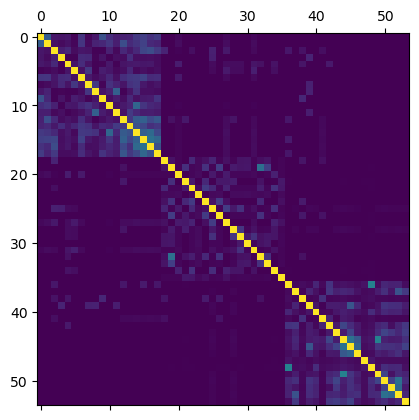

In [21]:
import matplotlib.pyplot as plt #biblioteka do rysowania

plt.matshow(similarity_df)
plt.show()

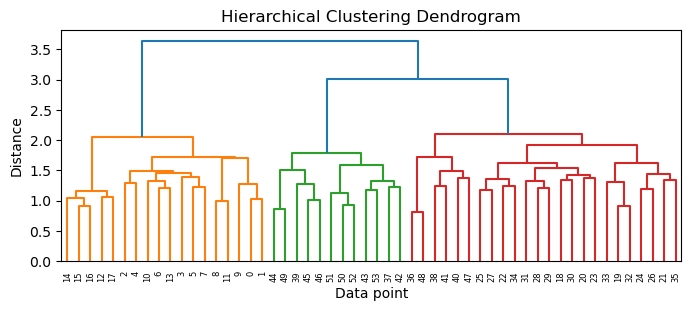

In [22]:
#topologia zależnosci pomiędzy dokumentami na podstawie podobieństw kosinusowych

from scipy.cluster.hierarchy import dendrogram, linkage  #przygotowanie do rysowania drzewka ponizej
import matplotlib.pyplot as plt  #biblioteka do rysowania

Z = linkage(similarity_matrix, 'ward') #na podstawie odleglosci wyzej wyznaczam topologie drzewka w oparciu o metode Warda (klasteryzacja hierarchiczna)


plt.figure(figsize=(8, 3))  #wymiar obrazka
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()